In [1]:
import pandas as pd
import numpy as np


### Part a

In [2]:
grades = np.loadtxt(
    'grades.csv',
    delimiter=',',
    # dtype=[
    #     ('H1', int),
    #     ('H2', int),
    #     ('H3', int),
    #     ('M1', int),
    #     ('H4', int),
    #     ('H5', int),
    #     ('H6', int),
    #     ('M2', int),
    #     ('H7', int),
    #     ('H8', int),
    #     ('M3', int),
    #     ('H9', int),
    #     ('F', int)
    # ]
    dtype=int,
)
grades_max = grades[-1]
grades = grades[:-1]  # truncate to remove max scores

_t = [
    'H1',
    'H2',
    'H3',
    'M1',
    'H4',
    'H5',
    'H6',
    'M2',
    'H7',
    'H8',
    'M3',
    'H9',
    'F'
]
t = {_n: i for (i, _n) in enumerate(_t)}

In [3]:
print(grades[:2])
print(grades_max)


[[18 21 15 26 18 16 25 21 18 28 36  8 33]
 [19 19 14 28 18 13 23 36 18 24 28  4 22]]
[20 24 16 44 18 18 26 44 20 30 42 10 35]


In [4]:
grades_percent = grades / grades_max * 100

In [5]:
grades_means = np.array([
    np.mean(grades_percent[:, [t[f'H{i}'] for i in range(1, 10)]], axis=1),
    np.mean(grades_percent[:, [t[f'M{i}'] for i in range(1, 4)]], axis=1),
    np.mean(grades_percent[:, [t['F']]], axis=1)
]).T

### Part b

In [6]:
Y = grades_means[:, 2]  # final score
X = np.vstack([np.ones((32)), grades_means[:, 0], grades_means[:, 1]]).T  # cludge but works

In [7]:
beta = np.linalg.inv(X.T @ X) @ X.T @ Y
S_sq = np.sum((Y - X @ beta)**2) / (len(Y) - len(beta))  # RSS / n - p

print(beta, S_sq)


[3.27836543 0.03087494 0.98617653] 270.3011358660822


### Part c

Note about the below: we *must* add degenerate dimensions to `A` (i.e. `A = [[...]]`) in order to correctly calculate the dot product!

In [8]:
# recall A is q x p (size)
A = np.array([[0, -1, 1]])  # corresponding to beta_1 = beta_2, betas 0-indexed
_theta = np.eye(len(beta)) - (A @ np.linalg.inv(X.T @ X) @ A.T)**(-1) * np.linalg.inv(X.T @ X) @ A.T @ A
beta_H0 = _theta @ beta


In [9]:
print(beta_H0)
print(beta)


[11.65306176  0.4446182   0.4446182 ]
[3.27836543 0.03087494 0.98617653]


In [10]:
import scipy.stats

df1 = 1  # q
df2 = len(Y) - len(beta)  # n - p

_rss = np.sum((Y - X @ beta)**2)
_rss_H0 = np.sum((Y - X @ beta_H0)**2)
p = scipy.stats.f.cdf((_rss_H0 - _rss) / _rss, df1, df2)

F = ((_rss_H0 - _rss)/ _rss) * (df2 / df1)
# test statistic at %5 significance level is 4.18
# if F > 4.18, reject null hypothesis
# print(df1, df2)
        
print(F)
print(p)


7.724868594408009
0.39031281398453693


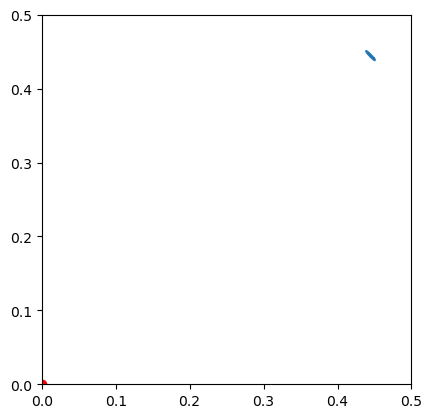

In [11]:
import matplotlib.pyplot as plt 

# Part 1: Make circle of radius sqrt(chi_sq_(a))
 
# set angle linspace, varies from 0-2pi 
angle = np.linspace( 0 , 2 * np.pi , 150 ) 

# we know that the ball has radius sqrt(chi-sq_(alpha = 0.05)_(p=3)
radius = np.sqrt(.352)

# parameterize circle by x = r*cos(theta) , y = r*sin(theta)
x =  radius * np.cos( angle ) 
y = radius * np.sin( angle )

x= x.reshape(1,-1)
y = y.reshape(1, -1)
transformed_circle_input = np.concatenate((x,y), axis=0)



# Part 2: Transform the circle into an ellipse via multiplication by truncated sigma^{-1/2} matrix.
# set scaling matrix: S * (X'X)^(-1/2) 

# helper function to diagonalize a matrix 
def diagonalize(M):
    e_val, e_vec = np.linalg.eig(M)
    P = e_vec
    D = e_val
    return P, D


P, D = diagonalize(np.transpose(X) @ X)

sig_neg_half = P @ np.diag(D**(-1/2)) @ np.transpose(P)

# turn circle into ellipse via (truncated) matrix multiplication
transformed_circle = np.dot(sig_neg_half[1:, 1:],transformed_circle_input)

# Part 3: Plot Ellipse and compare to the point (0,0)
figure, axes = plt.subplots(1, 1) 
axes.plot(beta_H0[1] + transformed_circle[0,:], beta_H0[2] + transformed_circle[1,:])
axes.plot(0,0, 'ro')
axes.set_xlim([0, 0.5])
axes.set_ylim([0, 0.5])
axes.set_aspect( 1 ) 


Note, this confidence ellipsoid is very small- this is reasonable to expect because we tested whether or not homework and midterms grades are a predictor for the final or not (and they are). 